In [82]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
mat=scipy.io.loadmat('ex3data1.mat')
X=mat['X']
y=mat['y']
for i in range(len(y)):
    if y[i]==10:
        y[i]=0
y=np.ravel(y)

In [86]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X)


In [87]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

In [108]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_samples, silhouette_score
print(silhouette_samples(X,clusters))
print("Silhouette Score is",silhouette_score(X,clusters))
print("Accuracy score is",accuracy_score(y, labels))

[ 0.11654255  0.154172    0.01968371 ... -0.08894065  0.00700539
 -0.04145245]
Silhouette Score is 0.05820856393854385
Accuracy score is 0.8868


# Applying PCA

In [89]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

digits_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=2,tol=0.01)

principal_components = pca.fit_transform(digits_scaled)
                    
digits_proj = pd.DataFrame(data = principal_components, 
                           columns = ['pc_1', 'pc_2'])

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

# Compute the accuracy
print("Accuracy score is",accuracy_score(y, labels))
print("Silhouette Score is",silhouette_score(X,labels))

Accuracy score is 0.322
Silhouette Score is 0.02548796349982375


# Applying t-SNE

In [91]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(X)

ready


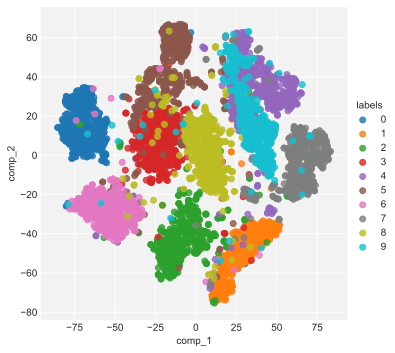

In [102]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.manifold import TSNE

sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(digits_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj ,fit_reg=False)
print("ready")


# Finding the best number of clusters by silhoutte score

Text(0.5,1,'number of clusters vs Silhoutte Score')

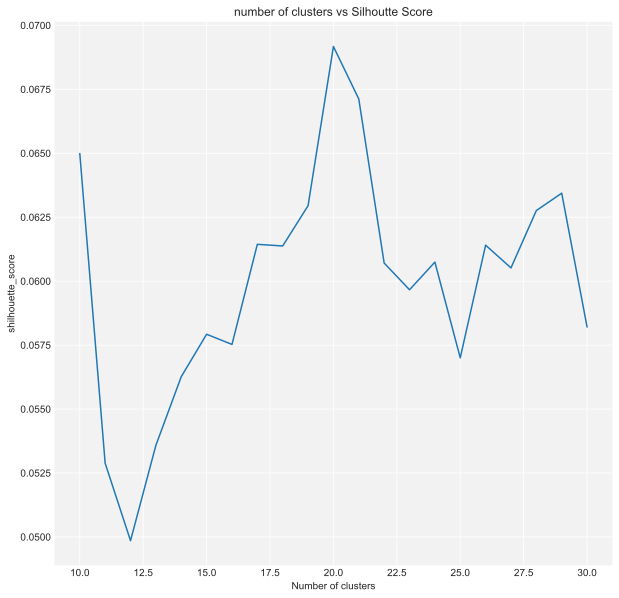

In [115]:
max_clusters=30
silhoutte_scores=[]
accuracy_scores=[]
for i in range(10,max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(digits_proj)
    
    labels = np.zeros_like(clusters)
    
    for j in range(i):
        mask = (clusters == j)
        labels[mask] = mode(y[mask])[0]
    
    ac = silhouette_score(X, clusters, metric='euclidean')
    silhoutte_scores+=[ac]
    accuracy_scores+=[accuracy_score(y, labels)]
plt.plot(range(10,max_clusters+1),silhoutte_scores)
plt.xlabel('Number of clusters')
plt.ylabel('shilhouette_score')
plt.title("number of clusters vs Silhoutte Score")

Text(0.5,1,'number of clusters vs accuracy Score')

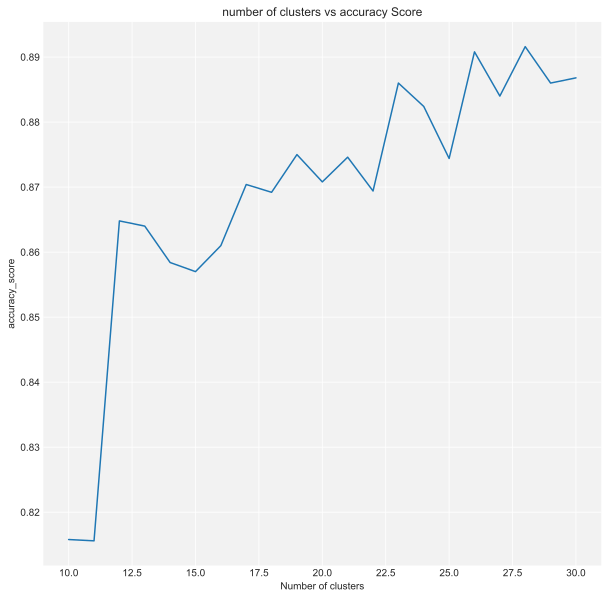

In [110]:
plt.plot(range(10,max_clusters+1),accuracy_scores)
plt.xlabel('Number of clusters')
plt.ylabel('accuracy_score')
plt.title("number of clusters vs accuracy Score")

#### Silhoutte Score is best at number of clusters=20. The accuracy at this point is also fine. Hence we select 20 as our number of clusters

## Final visualization of labels

ready


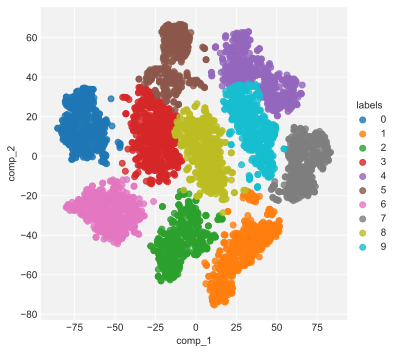

In [113]:
n_clusters=20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(digits_proj)
    
labels = np.zeros_like(clusters)
    
for j in range(i):
    mask = (clusters == j)
    labels[mask] = mode(y[mask])[0]
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
proj = pd.DataFrame(digits_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = labels
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj ,fit_reg=False)
print("ready")

# Data and prediction visualized

predicted = 
 [[9 8 8 9 4 3 8 2 3 7]
 [2 1 1 2 2 9 5 8 8 3]
 [1 8 1 3 0 5 1 7 9 5]
 [9 7 0 5 3 2 0 2 0 3]
 [5 7 0 1 8 9 1 0 0 4]
 [6 0 3 7 6 4 5 9 5 6]
 [2 9 9 7 3 6 8 3 1 1]
 [4 8 1 2 0 3 4 4 6 0]
 [4 2 4 8 2 0 8 5 7 1]
 [0 6 0 6 8 8 4 3 8 9]]


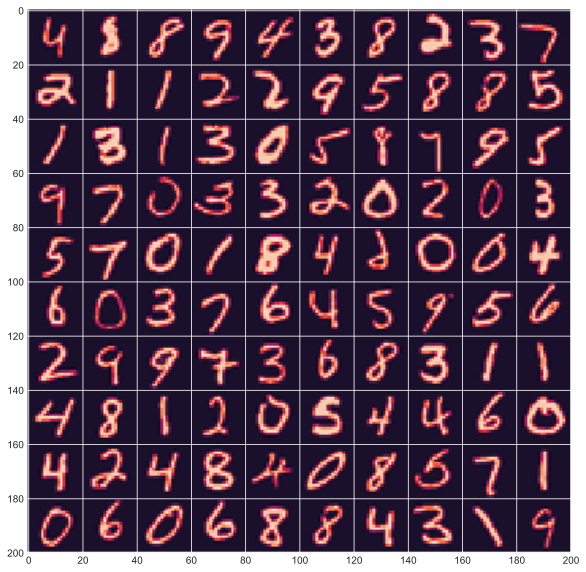

In [114]:
mask=np.random.randint(X.shape[0],size=100)
new=X[mask,:]
ans=np.zeros((200,200))
k=0
for i in range(20,220,20):
    for j in range(20,220,20):
        ans[j-20:j,i-20:i]=new[k].reshape(20,20)
        k+=1
ans=ans.T
plt.imshow(ans,interpolation='nearest')
ax = plt.gca()
ax.set_xticks(np.arange(0, 220, 20))
ax.set_yticks(np.arange(0,220,20))
pred=labels[mask].reshape(10,10)
print('predicted = \n',pred)
